In [44]:
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

In [45]:
df = pd.read_csv('https://raw.githubusercontent.com/vaksakalli/datasets/master/diamonds.csv')

In [60]:
df.head()

,carat,depth,table,price,cut
51721,0.77,61.7,56.0,2401,Ideal
284,1.00,58.2,60.0,2795,Premium
7748,0.61,62.1,56.0,4279,Ideal
25103,1.59,62.8,54.0,13631,Very Good
4884,1.01,60.0,60.0,3717,Premium


# Soal 1: Scatter Plot

Buatlah scatterplot menggunakan Seaborn dari data df di atas, variasikan menggunakan palette yang telah disediakan sehingga didapatkan output sesuai expected.

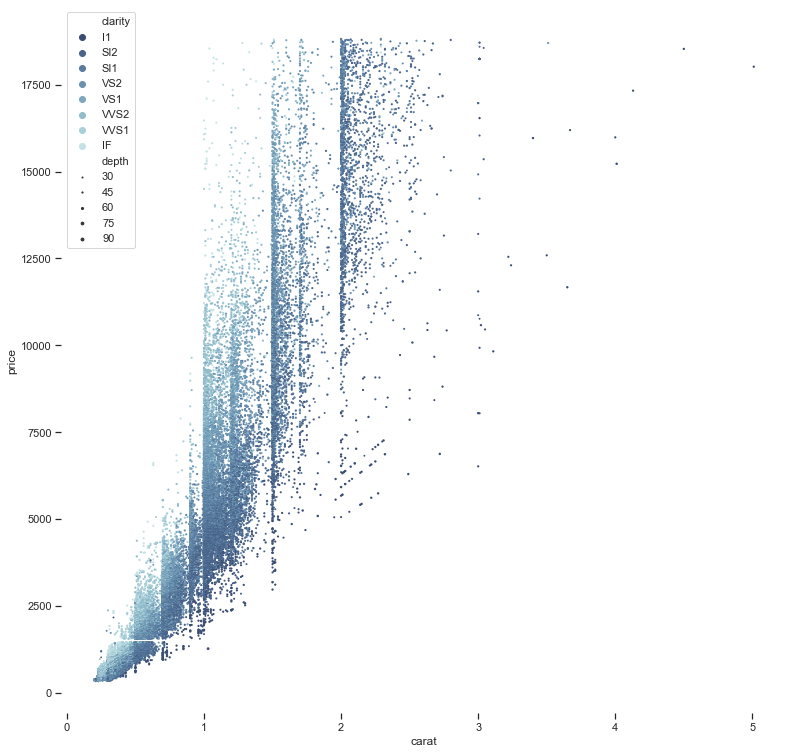

In [47]:
#code here
f, ax = plt.subplots(figsize=(13, 13))
sns.despine(f, left=True, bottom=True)
clarity_ranking = ["I1", "SI2", "SI1", "VS2", "VS1", "VVS2", "VVS1", "IF"]
sns.scatterplot(x="carat", y="price",
                hue="clarity", size="depth",
                palette="ch:r=-.2,d=.3_r",
                hue_order=clarity_ranking,
                sizes=(1, 8), linewidth=0,
                data=df, ax=ax)

Expected Output:

![alt text](https://drive.google.com/uc?id=1OyzNnrnkJ7TL8DIyh_2O97WuzesyLL7W)

# Soal 2: Facet Grid

Gunakan fungsi hexbin berikut untuk diterapkan pada mapping dari facetgridnya sehingga dihasilkan output sesuai expected.

```
def hexbin(x, y, color, **kwargs):
    cmap = sns.light_palette(color, as_cmap=True)
    plt.hexbin(x, y, gridsize=15, cmap=cmap, **kwargs)
```


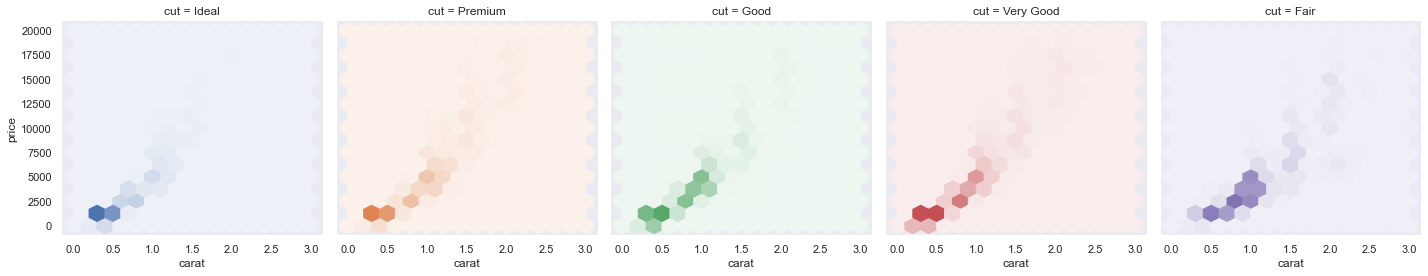

In [48]:
#code here
def hexbin(x, y, color, **kwargs):
    cmap = sns.light_palette(color, as_cmap=True)
    plt.hexbin(x, y, gridsize=15, cmap=cmap, **kwargs)

with sns.axes_style("dark"):
    grid = sns.FacetGrid(df, col="cut", hue="cut", height=4)
grid.map(hexbin, "carat", "price", extent=[0, 3.0, 0, 20000]);


Expected Output:

![alt text](https://drive.google.com/uc?id=1ZG6Uu0R_8mPAjpwublowrdUM6Hd1OXkI)

# Soal 3: Pair Plot

Ambil 300 data secara acak dari df, kemudian buat pair plotnya dari 300 data tersebut untuk kolom carat, depth, table, dan price sehingga dihasilkan output sesuai expected.

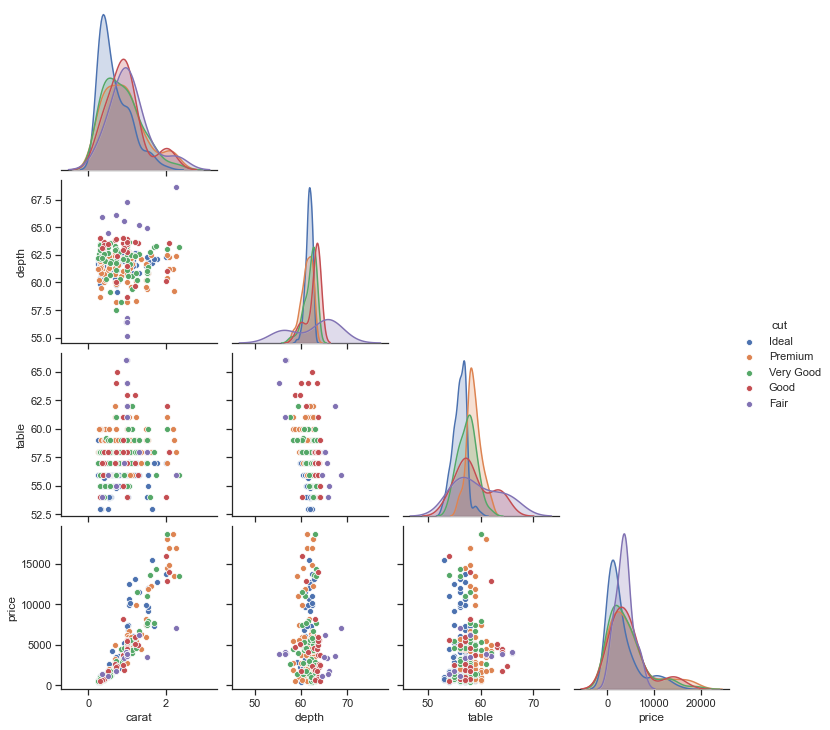

In [52]:
#code here
#sns.set(style="ticks")
df = df[['carat','depth','table','price','cut']].sample(n=300, random_state=123)
sns.pairplot(df, hue='cut',  corner=True);
plt.show()

Expected Output:

![alt text](https://drive.google.com/uc?id=1N3guRLAn5sIhfzzKFdvf1cZpmtEc-cw9)

# Soal 4: Joint Plot

Gunakan data yang sama dengan soal 3 untuk menghasilkan dua visualisasi joint plot antara carat dan price nya sesuai expected output.

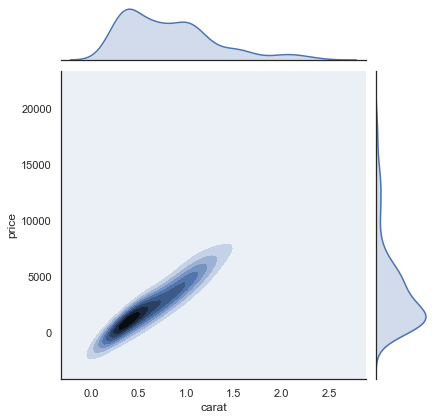

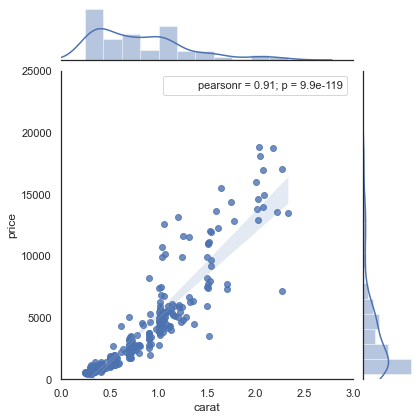

In [58]:
#code here
import warnings
import scipy.stats as stats
warnings.filterwarnings("ignore")

with sns.axes_style('white'):
    sns.jointplot(df['carat'], df['price'], kind='kde')
    
with sns.axes_style('white'):    
    sns.jointplot("carat", "price", data=df, kind='reg', stat_func=stats.pearsonr, xlim=(0,3), ylim=(0,25000));

Expected Output 1:

![alt text](https://drive.google.com/uc?id=1xX5Jq38-rr_oFD-eDRbBYCBA24Nmw2C5)

Expected Output 2:

![alt text](https://drive.google.com/uc?id=1QXY89CXRe1BzU0k7OBrr2fTn8WwIhWHo)